In [1]:
import transformers
from transformers import pipeline
import torch
from gensim.models import Word2Vec
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
# Comprobar si hay una GPU disponible
device = 0 if torch.cuda.is_available() else -1
# https://huggingface.co/docs/transformers/main_classes/logging
transformers.utils.logging.set_verbosity_error()

c:\Users\oscar.torresrodrigue\AppData\Local\miniconda3\envs\ia\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Leer el archivo
texto =  open(file="funes.txt", encoding='utf-8').read()

# Hacer una primera limpieza del texto
texto = texto.replace('\n',"")
texto = texto.replace('\ufeff',"")
texto = texto.replace('\xa0',"")

# Hacer una lista con cada frase del texto
sentences = texto.split("\t")
sentences

['Funes el memoriosoJorge Luis Borges',
 'Lo recuerdo (yo no tengo derecho a pronunciar ese verbo sagrado, sólo un hombre en la tierra tuvo derecho y ese hombre ha muerto) con una oscura pasionaria en la mano, viéndola como nadie la ha visto, aunque la mirara desde el crepúsculo del día hasta el de la noche, toda una vida entera. Lo recuerdo, la cara taciturna y aindiada y singularmente remota, detrás del cigarrillo. Recuerdo (creo) sus manos afiladas de trenzado. Recuerdo cerca de esas manos un mate, con las armas de la Banda Oriental; recuerdo en la ventana de la casa una estera amarilla, con un vago paisaje lacustre. Recuerdo claramente su voz; la voz pausada, resentida y nasal del orillero antiguo, sin los silbidos italianos de ahora. Más de tres veces no lo vi; la última, en 1887... Me parece muy feliz el proyecto de que todos aquellos que lo trataron escriban sobre él; mi testimonio será acaso el más breve y sin duda el más pobre, pero no el menos imparcial del volumen que editar

In [3]:
# Hacer una expresion regular para limpiar el texto
import re

sentences = list(map(lambda x : re.sub(r"[^\w\s]",' ',x),sentences))

In [4]:
sentences

['Funes el memoriosoJorge Luis Borges',
 'Lo recuerdo  yo no tengo derecho a pronunciar ese verbo sagrado  sólo un hombre en la tierra tuvo derecho y ese hombre ha muerto  con una oscura pasionaria en la mano  viéndola como nadie la ha visto  aunque la mirara desde el crepúsculo del día hasta el de la noche  toda una vida entera  Lo recuerdo  la cara taciturna y aindiada y singularmente remota  detrás del cigarrillo  Recuerdo  creo  sus manos afiladas de trenzado  Recuerdo cerca de esas manos un mate  con las armas de la Banda Oriental  recuerdo en la ventana de la casa una estera amarilla  con un vago paisaje lacustre  Recuerdo claramente su voz  la voz pausada  resentida y nasal del orillero antiguo  sin los silbidos italianos de ahora  Más de tres veces no lo vi  la última  en 1887    Me parece muy feliz el proyecto de que todos aquellos que lo trataron escriban sobre él  mi testimonio será acaso el más breve y sin duda el más pobre  pero no el menos imparcial del volumen que editar

In [44]:
# Tequenizacion de las frases
sentences_tokenized = []
for sent in sentences:
    sentences_tokenized.append(word_tokenize(sent.lower()))

# Entrenamos el modelo, se le pasa ula lista de sentencias, frases, transformados en tokens
model = Word2Vec(sentences_tokenized,vector_size=10,window=5,min_count=1,sg=0)


# from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('hiiamsid/sentence_similarity_spanish_es')
# embeddings = model.encode(sentences)


In [45]:
# Crear los embeddings
# si quisiésemos hacer un embedding de un párrafo o sentencia
# podemos hacer la media de los embeddings de sus tokens
# Por lo tanto obtendremos un embedding para cada frase que sera la media de todos los tokens que contenga

list_embeddings = []

for tokens in sentences_tokenized:
    embedding = sum(model.wv[w] for w in tokens) / len(tokens)
    list_embeddings.append(embedding)

In [6]:
model.wv.index_to_key

['de',
 'la',
 'el',
 'que',
 'en',
 'y',
 'un',
 'no',
 'me',
 'los',
 'del',
 'las',
 'lo',
 'una',
 'a',
 'había',
 'con',
 'funes',
 'era',
 'mi',
 'cada',
 'por',
 'su',
 'o',
 'ireneo',
 'sin',
 'es',
 'recuerdo',
 'más',
 'como',
 'yo',
 'todos',
 'dijo',
 'le',
 'voz',
 'sus',
 'se',
 'esa',
 'día',
 'vez',
 'tres',
 'muy',
 'dos',
 'ese',
 'casi',
 'noche',
 'todo',
 'mundo',
 'para',
 'vi',
 'memoria',
 'también',
 'mis',
 'al',
 'latín',
 'pero',
 'estaba',
 'después',
 'palabras',
 'ya',
 'lugar',
 'historia',
 'son',
 'recuerdos',
 'cara',
 'eran',
 'tan',
 'tenía',
 'creo',
 'esas',
 'porque',
 'francisco',
 'hasta',
 'ha',
 'bernardo',
 'números',
 'padre',
 'naturalis',
 'año',
 'primer',
 'sólo',
 'nadie',
 'cosas',
 'él',
 'mil',
 'patio',
 'veces',
 'ahora',
 'fray',
 'bentos',
 'sola',
 'nombre',
 'tal',
 'toda',
 'años',
 'fondo',
 'ojos',
 'tierra',
 'catre',
 'sabía',
 'perro',
 'desde',
 'visto',
 'entre',
 'diálogo',
 'otro',
 'menos',
 'percepción',
 'san',
 '

In [7]:
# Esto nos devuelve los embeddings de todas las frases. Una lista con todas las palabras al monton, sin estar separadas por frases
# embedding = model.wv.vectors

In [20]:
# embedding.shape

(1119, 10)

In [8]:
#from scipy.spatial import distance


#cosine_dist =  distance.cosine(embedding2,embedding3)
#print(cosine_dist)

In [9]:
# from scipy.spatial import distance

# # Da la distancia del coseno para calcular con los dos arrays de los tokens 
# # Se cogen dos valores de los embeddings para calcular la relacion que hay entre ellos
# cosine_dist = distance.cosine(embedding[1100],embedding[2])
# print(cosine_dist)

0.6999336779117584


In [10]:
import pandas as pd
from sklearn.decomposition import PCA

# Realizamos un pca para reducir la dimensionalidad del array
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(pd.DataFrame(embedding))

In [11]:
X_reduced.shape

(1119, 2)

In [12]:
words = list(model.wv.index_to_key)

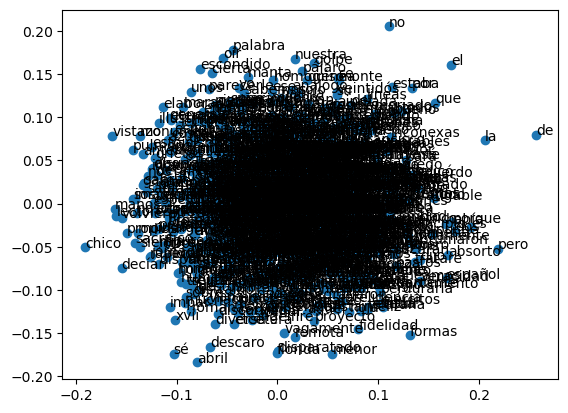

In [13]:
from matplotlib import pyplot as plt

# Cojemos todo de la primera columna para las y y todo de la segunda para las x
# x = X_reduced[:,0]
# y = X_reduced[:,1]

plt.scatter(X_reduced[:,0],X_reduced[:,1])

for x in range(len(X_reduced)):
    plt.text(X_reduced[x,0],X_reduced[x,1],words[x])

In [14]:
import plotly.express as px

df=pd.DataFrame([X_reduced[:,0],X_reduced[:,1],words]).transpose()
df.columns = ['X','Y','WORD']
df=df.set_index("WORD")

px.scatter_3d(
    x=df.X,y=df.Y,z=df.index,color=df.index,text=df.index
)

### Mediante una frase proporcionada, encontrar el parafo que mejor se ajuste

* Sacar los embeddings para cada frase 
* Sacar el embedding para la frase introducida por el usuario
* Hacer el coseno del embedding del usuario con todos los embeddings que tenemos, comparar los valores y el que menor valor tenga es el que mas se ajusta

In [64]:
user_sentence = "Diego es tonto"

# Tequenizacion de la frase del usuario
user_tokenized = word_tokenize(user_sentence.lower())

# Entrenamos el modelo, se le pasa ula lista de sentencias, frases, transformados en tokens
user_model = Word2Vec([user_tokenized],vector_size=10,window=5,min_count=1,sg=0)

user_embedding = sum(user_model.wv[w] for w in user_tokenized) / len(user_tokenized)

In [70]:
# Calculamos el coseno para cada embedding con la frase del usuario, nos quedaremos con el menor de los valores
from scipy.spatial import distance

# Da la distancia del coseno para calcular con los dos arrays de los tokens 
# Se cogen dos valores de los embeddings para calcular la relacion que hay entre ellos
min_coss = 10
indice = 0
for index, embedding in enumerate(list_embeddings):
    cosine_dist = distance.cosine(embedding,user_embedding)
    if cosine_dist < min_coss:
        min_coss = cosine_dist
        indice = index

print("El embedding con el menor coseno es el",indice,"con un valor de",min_coss)
print(sentences[indice])

El embedding con el menor coseno es el 7 con un valor de 0.23428267240524292
Recuerdo la impresión de incómoda magia que la noticia me produjo  la única vez que yo lo vi  veníamos a caballo de San Francisco y él andaba en un lugar alto  el hecho  en boca de mi primo Bernardo  tenía mucho de sueño elaborado con elementos anteriores 
